## Importações

Como sempre, utilizaremos algumas bibliotecas para realizar o trabalho.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

## Funções Auxiliares

In [115]:
def calcula_estatisticas(dado):
    return {
        'mean': dado.mean(),
        'std': dado.std(),
        'min': dado.min(),
        'max': dado.max(),
        'mode': dado.mode().iloc[0] if not dado.mode().empty else None,
        'quartis': dado.quantile([0.25, 0.5, 0.75])
    }

In [116]:
def estatisticas_votos(df, nome):
    resultados = {}
    
    for n in df[nome].unique():
        df_n = df[df[nome] == n]
        
        for turno in [1, 2, 3]:
            if turno != 3:
                df_turno = df_n[df_n['NR_TURNO'] == turno]
            else:
                df_turno = df_n
            
            votos = df_turno['QT_VOTOS']
            votos_summary = calcula_estatisticas(votos)
            
            resultados[(n, turno)] = votos_summary
    
    return resultados

In [117]:
def estatisticas_despesas(df, nome):
    resultados = {}
    
    for n in df[nome].unique():
        df_n = df[df[nome] == n]
        
        for turno in [1, 2, 3]:
            if turno != 3:
                df_turno = df_n[df_n['NR_TURNO'] == turno]
            else:
                df_turno = df_n
            
            despesas = df_turno['VR_DESPESA_CONTRATADA'].replace(',', '.', regex=True).astype(float)
            despesas_summary = calcula_estatisticas(despesas)
            
            resultados[(n, turno)] = despesas_summary
    
    return resultados

---

# Extraindo Informações - Candidatos

1. **Quantidade de Instâncias**
2. **Candidatos por Estado:**
    - Quantidade de candidatos para governador por estado
    - Média da quantidade de candidatos por estado
    - Desvio padrão da quantidade de candidatos por estado
    - Moda da quantidade de candidatos por estado
    - Valor mínimo e máximo da quantidade de candidatos por estado
    - Quartis (1º, 2º - mediana, e 3º) da quantidade de candidatos por estado
3. **Candidatos por Partido:**
    - Quantidade de candidatos para governador por partido
    - Média da quantidade de candidatos por partido
    - Desvio padrão da quantidade de candidatos por partido
    - Moda da quantidade de candidatos por partido
    - Valor mínimo e máximo da quantidade de candidatos por partido
    - Quartis (1º, 2º - mediana, e 3º) da quantidade de candidatos por partido

In [118]:
df = pd.read_csv('Resultados\\Candidatos.csv', delimiter=',', encoding='utf-8')
df.head()

,ANO_ELEICAO,SG_UF,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,PASSOU_TURNO
0,2022,BA,GOVERNADOR,50001609248,ANTONIO CARLOS PEIXOTO DE MAGALHÃES NETO,44,UNIÃO,True
1,2022,PB,GOVERNADOR,150001621388,PEDRO OLIVEIRA CUNHA LIMA,45,PSDB,True
2,2022,SC,GOVERNADOR,240001611127,JORGINHO DOS SANTOS MELLO,22,PL,True
3,2022,MS,GOVERNADOR,120001714229,RENAN BARBOSA CONTAR,28,PRTB,True
4,2022,SC,GOVERNADOR,240001647445,DÉCIO NERY DE LIMA,13,PT,True


### Quantidade de Instâncias

In [119]:
total = df['SQ_CANDIDATO'].count()
print('Quantidade total de instâncias de candidatos:', total)

Quantidade total de instâncias de candidatos: 224


### Quantidade por Estado

In [120]:
uf = df['SG_UF'].value_counts()

uf_counts = uf.reset_index()
uf_counts.columns = ['SG_UF', 'COUNT']

uf_summary = calcula_estatisticas(uf)

In [121]:
print(f"Média: {uf_summary['mean']:.2f}")
print(f"Desvio: {uf_summary['std']:.2f}")
print(f"Valor mínimo: {uf_summary['min']:.2f}")
print(f"Quartil 2: {uf_summary['quartis'][0.25]:.2f}")
print(f"Mediana: {uf_summary['quartis'][0.5]:.2f}")
print(f"Quartil 3: {uf_summary['quartis'][0.75]:.2f}")
print(f"Valor máximo: {uf_summary['max']:.2f}")
print(f"Moda: {uf_summary['mode']}")
print('Quantidade total de candidatos por estado:')
uf_counts

Média: 8.30
Desvio: 1.96
Valor mínimo: 4.00
Quartil 2: 7.00
Mediana: 9.00
Quartil 3: 9.00
Valor máximo: 12.00
Moda: 9
Quantidade total de candidatos por estado:


,SG_UF,COUNT
0,RS,12
1,DF,12
2,PE,11
3,SC,10
4,MG,10
5,SP,10
6,RN,9
7,RJ,9
8,PA,9
9,GO,9


### Quantidade por Partido

In [122]:
partido = df['SG_PARTIDO'].value_counts()

partido_counts = partido.reset_index()
partido_counts.columns = ['SG_PARTIDO', 'COUNT']

partido_summary = calcula_estatisticas(partido)

In [123]:
print(f"Média: {partido_summary['mean']:.2f}")
print(f"Desvio: {partido_summary['std']:.2f}")
print(f"Valor mínimo: {partido_summary['min']:.2f}")
print(f"Quartil 2: {partido_summary['quartis'][0.25]:.2f}")
print(f"Mediana: {partido_summary['quartis'][0.5]:.2f}")
print(f"Quartil 3: {partido_summary['quartis'][0.75]:.2f}")
print(f"Valor máximo: {partido_summary['max']:.2f}")
print(f"Moda: {partido_summary['mode']}")
print('Quantidade total de candidatos por partido:')
partido_counts

Média: 7.47
Desvio: 4.97
Valor mínimo: 1.00
Quartil 2: 3.00
Mediana: 7.00
Quartil 3: 10.75
Valor máximo: 20.00
Moda: 3
Quantidade total de candidatos por partido:


,SG_PARTIDO,COUNT
0,PSOL,20
1,PSTU,17
2,PCO,16
3,PL,14
4,PT,13
5,UNIÃO,12
6,PCB,11
7,PSD,11
8,PDT,10
9,MDB,9


---

# Extraindo Informações - Votos

Com mais quantidade de informações na tabela de votos, extraímos:

1. **Quantidade de Instâncias**
2. **Votos (Geral)**:
    - Quantidade de votos para governador
    - Média da votos de candidatos
    - Desvio padrão da quantidade de votos
    - Moda da quantidade de votos
    - Valor mínimo e máximo da quantidade de votos
    - Quartis (1º, 2º - mediana, e 3º) da quantidade de votos
3. **Votos por Estado (Turno 1 e Turno 2 e Ambos)**:
    - Quantidade de votos para governador por estado
    - Média da votos de candidatos por estado
    - Desvio padrão da quantidade de votos por estado
    - Moda da quantidade de votos por estado
    - Valor mínimo e máximo da quantidade de votos por estado
    - Quartis (1º, 2º - mediana, e 3º) da quantidade de votos por estado

In [124]:
df = pd.read_csv('Resultados\\Votos.csv', delimiter=',', encoding='utf-8')
df.head()

,NR_TURNO,SG_UF,DS_CARGO,QT_VOTOS,SQ_CANDIDATO
0,1,AC,GOVERNADOR,1,10001595336
1,1,AC,GOVERNADOR,2,10001595336
2,1,AC,GOVERNADOR,1,10001595336
3,1,AC,GOVERNADOR,2,10001595336
4,1,AC,GOVERNADOR,1,10001595336


### Quantidade de Instâncias

In [125]:
total = df['SQ_CANDIDATO'].count()
print('Quantidade total de instâncias de votos:', total)

Quantidade total de instâncias de votos: 4404307


### Votos (Geral)

In [126]:
votos = df['QT_VOTOS']

votos_counts = df['QT_VOTOS'].value_counts().reset_index()
votos_counts.columns = ['QT_VOTOS', 'COUNT']

votos_summary = calcula_estatisticas(votos)

In [127]:
print(f"Média: {votos_summary['mean']:.2f}")
print(f"Desvio: {votos_summary['std']:.2f}")
print(f"Valor mínimo: {votos_summary['min']:.2f}")
print(f"Quartil 2: {votos_summary['quartis'][0.25]:.2f}")
print(f"Mediana: {votos_summary['quartis'][0.5]:.2f}")
print(f"Quartil 3: {votos_summary['quartis'][0.75]:.2f}")
print(f"Valor máximo: {votos_summary['max']:.2f}")
print(f"Moda: {votos_summary['mode']}")
print('Quantidade total de votos:')
votos_counts

Média: 42.98
Desvio: 51.15
Valor mínimo: 1.00
Quartil 2: 6.00
Mediana: 19.00
Quartil 3: 69.00
Valor máximo: 399.00
Moda: 1
Quantidade total de votos:


,QT_VOTOS,COUNT
0,1,458782
1,2,224363
2,3,152676
3,4,125259
4,5,112651
...,...,...
347,359,1
348,364,1
349,399,1
350,352,1


### Votos por Estado (Turno 1, Turno 2 e Ambos)

In [128]:
estatisticas_votos_uf = estatisticas_votos(df, 'SG_UF')

data = []

for (estado, turno), votos_summary in estatisticas_votos_uf.items():
    data.append({
        'Estado': estado,
        'Turno': turno,
        'Média': votos_summary['mean'],
        'Desvio': votos_summary['std'],
        'Min': votos_summary['min'],
        'Quartil 1': votos_summary['quartis'][0.25],
        'Mediana': votos_summary['quartis'][0.5],
        'Quartil 3': votos_summary['quartis'][0.75],
        'Máximo': votos_summary['max'],
        'Moda': votos_summary['mode']
    })
    
df_estatisticas = pd.DataFrame(data)

In [129]:
df_estatisticas = df_estatisticas.dropna(subset=['Média', 'Desvio', 'Min', 'Quartil 1', 'Mediana', 'Quartil 3', 'Máximo', 'Moda'], how='all')
df_estatisticas = df_estatisticas.drop_duplicates(subset=['Estado', 'Média', 'Desvio'], keep='first')
df_estatisticas

,Estado,Turno,Média,Desvio,Min,Quartil 1,Mediana,Quartil 3,Máximo,Moda
0,AC,1,29.441981,39.935231,1.0,4.0,11.0,37.0,245.0,1.0
3,AL,1,37.819732,39.307648,1.0,9.0,25.0,53.0,263.0,1.0
4,AL,2,67.385241,62.725716,1.0,12.0,36.0,117.0,284.0,5.0
5,AL,3,48.370836,50.974445,1.0,10.0,27.0,77.0,284.0,1.0
6,AM,1,34.824875,39.583716,1.0,5.0,19.0,53.0,309.0,1.0
7,AM,2,71.006395,61.171716,1.0,15.0,47.0,121.0,399.0,1.0
8,AM,3,46.556228,50.585788,1.0,8.0,23.0,77.0,399.0,1.0
9,AP,1,39.621886,54.005713,1.0,3.0,7.0,86.0,364.0,1.0
12,BA,1,45.965447,52.382212,1.0,7.0,17.0,84.0,349.0,1.0
13,BA,2,66.595675,68.802457,1.0,6.0,30.0,122.0,354.0,3.0


---

# Extraindo Informações - Despesas

Com mais quantidade de informações na tabela de despesas, extraímos:

1. **Quantidade de Instâncias**
2. **Despesas (Geral)**:
    - Quantidade de despesas para governador
    - Média de despesas de candidatos
    - Desvio padrão do valor de despesas
    - Moda do valor das despesas
    - Valor mínimo e máximo das despesas
    - Quartis (1º, 2º - mediana, e 3º) da despesas
3. **Despesas por Estado (Turno 1 e Turno 2 e Ambos)**:
    - Quantidade de despesas para governador por estado
    - Média de despesas de candidatos por estado
    - Desvio padrão do valor de despesas por estado
    - Moda do valor das despesas por estado
    - Valor mínimo e máximo das despesas por estado
    - Quartis (1º, 2º - mediana, e 3º) da despesas por estado
4. **Despesas por Partido (Turno 1 e Turno 2 e Ambos)**:
    - Quantidade de despesas para governador por partido
    - Média de despesas de candidatos por partido
    - Desvio padrão do valor de despesas por partido
    - Moda do valor das despesas por partido
    - Valor mínimo e máximo das despesas por partido
    - Quartis (1º, 2º - mediana, e 3º) da despesas por partido
4. **Despesas por Origem (Turno 1 e Turno 2 e Ambos)**:
    - Quantidade de despesas para governador por origem
    - Média de despesas de candidatos por origem
    - Desvio padrão do valor de despesas por origem
    - Moda do valor das despesas por origem
    - Valor mínimo e máximo das despesas por origem
    - Quartis (1º, 2º - mediana, e 3º) da despesas por origem

In [149]:
df = pd.read_csv('Resultados\\Despesas.csv', delimiter=',', encoding='utf-8')
df.head()

,NR_TURNO,SG_UF,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,DS_ORIGEM_DESPESA,VR_DESPESA_CONTRATADA
0,1,AC,GOVERNADOR,10001639519,CYLMARA FERNANDES DA ROCHA GRIPP,MDB,Atividades de militância e mobilização de rua,"1858,40"
1,1,AC,GOVERNADOR,10001612476,GLADSON DE LIMA CAMELI,PP,Atividades de militância e mobilização de rua,"1300,00"
2,1,AC,GOVERNADOR,10001639519,CYLMARA FERNANDES DA ROCHA GRIPP,MDB,Atividades de militância e mobilização de rua,"848,00"
3,1,AC,GOVERNADOR,10001623440,MARCIO MIGUEL BITTAR,UNIÃO,Atividades de militância e mobilização de rua,"1200,00"
4,1,AC,GOVERNADOR,10001639519,CYLMARA FERNANDES DA ROCHA GRIPP,MDB,Atividades de militância e mobilização de rua,"1857,00"


### Quantidade de Instâncias

In [150]:
total = df['SQ_CANDIDATO'].count()
print('Quantidade total de instâncias de despesas:', total)

Quantidade total de instâncias de despesas: 118840


### Despesas (Geral)

In [132]:
despesas = df['VR_DESPESA_CONTRATADA'].replace(',', '.', regex=True).astype(float)

despesas_counts = despesas.value_counts().reset_index()
despesas_counts.columns = ['VR_DESPESA_CONTRATADA', 'COUNT']

despesas_summary = calcula_estatisticas(despesas)

In [133]:
print(f"Média: {despesas_summary['mean']:.2f}")
print(f"Desvio: {despesas_summary['std']:.2f}")
print(f"Valor mínimo: {despesas_summary['min']:.2f}")
print(f"Quartil 2: {despesas_summary['quartis'][0.25]:.2f}")
print(f"Mediana: {despesas_summary['quartis'][0.5]:.2f}")
print(f"Quartil 3: {despesas_summary['quartis'][0.75]:.2f}")
print(f"Valor máximo: {despesas_summary['max']:.2f}")
print(f"Moda: {despesas_summary['mode']}")
print('Quantidade total de votos:')
despesas_counts.head(10)

Média: 7091.63
Desvio: 68028.96
Valor mínimo: 0.00
Quartil 2: 300.00
Mediana: 650.00
Quartil 3: 1712.50
Valor máximo: 11472361.00
Moda: 11.0
Quantidade total de votos:


,VR_DESPESA_CONTRATADA,COUNT
0,11.0,7121
1,600.0,6715
2,500.0,4609
3,1200.0,4012
4,400.0,3942
5,1000.0,3857
6,650.0,3065
7,300.0,2323
8,1500.0,1733
9,1.3,1660


### Despesas por Estado (Turno 1, Turno 2 e Ambos)

In [134]:
estatisticas_despesas_uf = estatisticas_despesas(df, 'SG_UF')

data = []

for (estado, turno), votos_summary in estatisticas_despesas_uf.items():
    data.append({
        'Estado': estado,
        'Turno': turno,
        'Média': votos_summary['mean'],
        'Desvio': votos_summary['std'],
        'Min': votos_summary['min'],
        'Quartil 1': votos_summary['quartis'][0.25],
        'Mediana': votos_summary['quartis'][0.5],
        'Quartil 3': votos_summary['quartis'][0.75],
        'Máximo': votos_summary['max'],
        'Moda': votos_summary['mode']
    })
    
df_estatisticas = pd.DataFrame(data)

In [135]:
df_estatisticas = df_estatisticas.dropna(subset=['Média', 'Desvio', 'Min', 'Quartil 1', 'Mediana', 'Quartil 3', 'Máximo', 'Moda'], how='all')
df_estatisticas = df_estatisticas.drop_duplicates(subset=['Estado', 'Média', 'Desvio'], keep='first')
df_estatisticas 

,Estado,Turno,Média,Desvio,Min,Quartil 1,Mediana,Quartil 3,Máximo,Moda
0,AC,1,4895.018743,30638.235996,0.35,800.0000,1200.0,1857.0000,800000.00,1200.00
3,AL,1,7556.781312,29394.606684,0.00,16.7525,650.0,3000.0000,390000.00,11.00
4,AL,2,22167.529348,108135.073435,1.20,11.0000,2360.0,10000.0000,2350000.00,11.00
5,AL,3,15362.278735,81846.416740,0.00,13.8750,1200.0,6187.5000,2350000.00,11.00
6,AM,1,5901.250498,35586.780428,0.79,500.0000,606.0,1500.0000,900000.00,606.00
7,AM,2,1840.553616,20424.251447,1.30,368.3300,500.0,695.0000,1500000.00,400.00
8,AM,3,3024.519842,25847.742077,0.79,400.0000,500.0,1000.0000,1500000.00,400.00
9,AP,1,21177.695198,80932.245220,1.30,1000.0000,4000.0,11525.0000,1140000.00,11.00
12,BA,1,15301.212086,85293.779694,0.16,170.0000,1387.5,7875.0000,1500000.00,11.65
13,BA,2,15927.438315,82172.804372,1.30,11.0000,160.0,2835.1400,1950000.00,11.00


### Despesas por Partido (Turno 1, Turno 2 e Ambos)

In [143]:
estatisticas_despesas_partido = estatisticas_despesas(df, 'SG_PARTIDO')

data = []

for (estado, turno), votos_summary in estatisticas_despesas_partido.items():
    data.append({
        'Partido': estado,
        'Turno': turno,
        'Média': votos_summary['mean'],
        'Desvio': votos_summary['std'],
        'Min': votos_summary['min'],
        'Quartil 1': votos_summary['quartis'][0.25],
        'Mediana': votos_summary['quartis'][0.5],
        'Quartil 3': votos_summary['quartis'][0.75],
        'Máximo': votos_summary['max'],
        'Moda': votos_summary['mode']
    })
    
df_estatisticas = pd.DataFrame(data)

In [144]:
df_estatisticas = df_estatisticas.dropna(subset=['Média', 'Desvio', 'Min', 'Quartil 1', 'Mediana', 'Quartil 3', 'Máximo', 'Moda'], how='all')
df_estatisticas = df_estatisticas.drop_duplicates(subset=['Partido', 'Média', 'Desvio'], keep='first')
df_estatisticas 

,Partido,Turno,Média,Desvio,Min,Quartil 1,Mediana,Quartil 3,Máximo,Moda
0,MDB,1,3944.429833,27375.121145,0.35,312.500,625.000,1350.0000,1000000.0,625.00
3,PP,1,7217.743882,41408.068207,0.01,280.000,1200.000,1800.0000,838000.0,1200.00
6,UNIÃO,1,8781.335232,42517.871200,0.35,365.380,1000.000,2160.0000,889000.0,600.00
9,PSD,1,11316.390297,94854.362835,0.01,229.955,1023.000,1939.2000,3652000.0,400.00
12,PT,1,6924.571693,48447.985176,0.01,150.000,600.000,2332.3600,2574000.0,500.00
15,AGIR,1,6022.979266,13642.624340,1.30,130.000,2500.000,3000.0000,101500.0,2500.00
18,PSOL,1,3557.642402,9020.338989,0.16,144.990,900.000,3000.0000,140000.0,11.00
21,PTB,1,3828.446425,18661.369997,1.30,50.000,287.500,1546.5025,288750.0,250.00
24,PMB,1,1932.830515,9052.453928,0.00,179.750,392.000,1000.0000,100000.0,324.00
27,PRTB,1,1228.666667,1612.631718,0.00,145.000,873.500,1467.5000,6000.0,11.00


### Despesas por Origem (Turno 1, Turno 2 e Ambos)

In [154]:
estatisticas_despesas_origem = estatisticas_despesas(df, 'DS_ORIGEM_DESPESA')

data = []

for (estado, turno), votos_summary in estatisticas_despesas_origem.items():
    data.append({
        'Origem': estado,
        'Turno': turno,
        'Média': votos_summary['mean'],
        'Desvio': votos_summary['std'],
        'Min': votos_summary['min'],
        'Quartil 1': votos_summary['quartis'][0.25],
        'Mediana': votos_summary['quartis'][0.5],
        'Quartil 3': votos_summary['quartis'][0.75],
        'Máximo': votos_summary['max'],
        'Moda': votos_summary['mode']
    })
    
df_estatisticas = pd.DataFrame(data)

In [155]:
df_estatisticas = df_estatisticas.dropna(subset=['Média', 'Desvio', 'Min', 'Quartil 1', 'Mediana', 'Quartil 3', 'Máximo', 'Moda'], how='all')
df_estatisticas = df_estatisticas.drop_duplicates(subset=['Origem', 'Média', 'Desvio'], keep='first')
df_estatisticas = df_estatisticas[df_estatisticas["Turno"] == 1]
df_estatisticas

,Origem,Turno,Média,Desvio,Min,Quartil 1,Mediana,Quartil 3,Máximo,Moda
0,Atividades de militância e mobilização de rua,1,1216.950141,26322.110569,20.00,500.0000,650.000,1200.0000,4260799.80,650.00
3,Serviços prestados por terceiros,1,30546.022068,191648.898419,2.00,775.0000,3133.330,11250.0000,6800000.00,100.00
6,Cessão ou locação de veículos,1,7318.117490,9155.527686,15.99,2500.0000,4710.000,10000.0000,200000.00,3000.00
9,Serviços advocatícios,1,75252.022043,167936.519069,217.25,3125.0000,15000.000,71250.0000,2000000.00,3108.10
12,Despesas com transporte ou deslocamento,1,28267.432915,73785.905677,3.00,305.0000,4000.000,23300.0000,720000.00,205.00
15,Publicidade por carros de som,1,12896.105364,35433.854393,100.00,1250.0000,3000.000,15000.0000,520000.00,3000.00
18,Locação/cessão de bens imóveis,1,12743.486345,40339.780172,2.99,1500.0000,3625.000,8000.0000,600000.00,2000.00
21,Alimentação,1,963.500867,4647.641845,0.01,13.8950,69.000,404.5000,145000.00,450.00
24,Locação/cessão de bens móveis (exceto veículos),1,12060.325655,46251.413328,15.00,640.0000,1775.000,5000.0000,470500.00,500.00
27,Despesa com Impulsionamento de Conteúdos,1,22712.704037,47932.948333,5.38,5000.0000,7904.000,20000.0000,994002.60,5000.00


# Encontrando Outliers

Agora, com todos os dados observados, buscamos encontrar aqueles candidatos que investiram a maior quantidade em suas campanhas. Para isso, realizamos um boxplot e pegamos todos aqueles que estão fora do limite superior.

In [156]:
df['VR_DESPESA_CONTRATADA'] = df['VR_DESPESA_CONTRATADA'].replace(',', '.', regex=True).astype(float)

soma_despesas_candidato = df.groupby('NM_CANDIDATO')['VR_DESPESA_CONTRATADA'].sum()

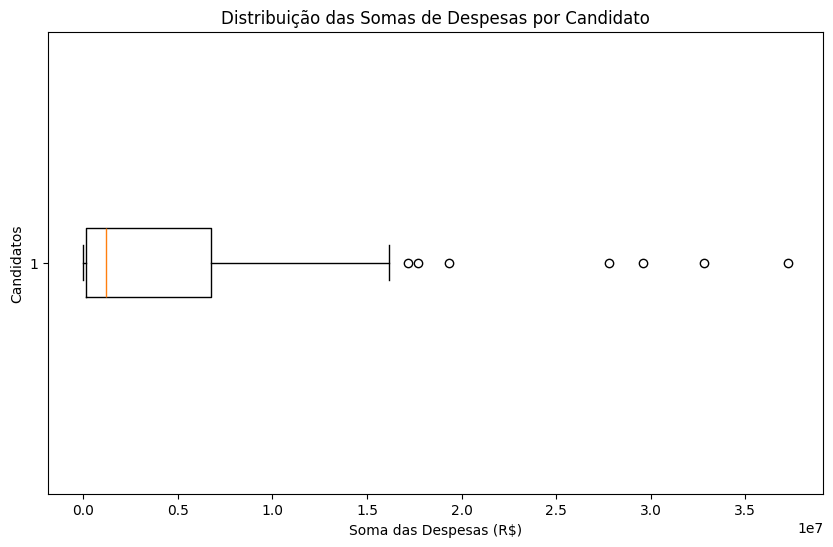

In [157]:
plt.figure(figsize=(10, 6))
plt.boxplot(soma_despesas_candidato, vert=False)
plt.title('Distribuição das Somas de Despesas por Candidato')
plt.xlabel('Soma das Despesas (R$)')
plt.ylabel('Candidatos')
plt.show()

In [158]:
top_candidatos = soma_despesas_candidato.sort_values(ascending=False)
top_candidatos = pd.DataFrame(top_candidatos).reset_index()
top_candidatos.head(10)

,NM_CANDIDATO,VR_DESPESA_CONTRATADA
0,TARCISIO GOMES DE FREITAS,37253908.90
1,FERNANDO HADDAD,32814235.13
2,RODRIGO GARCIA,29566069.48
3,ANTONIO CARLOS PEIXOTO DE MAGALHÃES NETO,27772339.83
4,CLÁUDIO BOMFIM DE CASTRO E SILVA,19322516.67
5,ROMEU ZEMA NETO,17686079.30
6,RAQUEL TEIXEIRA LYRA LUCENA,17140835.32
7,ONYX DORNELLES LORENZONI,16167204.10
8,ALEXANDRE KALIL,16081867.02
9,EDUARDO FIGUEIREDO CAVALHEIRO LEITE,14439819.64
